<Body>   
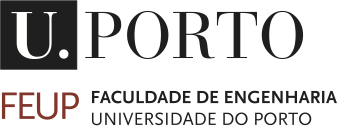   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Feb. 2022

---


# **Notebook #07: Classification (part 2)**


# k-Nearest Neighbor rule

Take a training set of pairs $\{(y_n,\mathbf{x}_n)\}_{n=1}^N$ for a $M$-class classification problem and let $k>0$ be a given integer parameter. Given a sample/pattern $\mathbf{x}$, the $k$-nearest neighbor ($k$-NN) classification rule consists in assigning $\mathbf{x}$ to the class in which the majority of its $k$ nearest training points belong to (according to a given metric).



## **Activity 1**

Consider a set of data with two features from a representative data set of points of two classes ($\omega_1$ and $\omega_2$). 

In [1]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/evpwqery7uleqw1/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          


**2.1** Plot the data from the data set. 


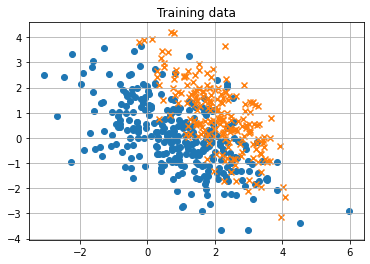

In [2]:
# Activity 2.1 (solution)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read data from file
df = pd.read_csv('data-set.csv')
npoints = df.values.shape[0]

# plot data
classData = df.values[:,2]
plt.figure()
plt.scatter(df.values[np.where(classData==1),0], df.values[np.where(classData==1),1], marker='o')
plt.scatter(df.values[np.where(classData==2),0], df.values[np.where(classData==2),1], marker='x')
plt.title('Training data')
plt.plot()
plt.grid()
plt.show()

In [3]:
print(df)

           X1        X2   label
0    0.641113  0.195007       1
1   -1.642258  2.807978       1
2    1.927658  0.569198       1
3    1.446395 -0.174693       1
4    3.048043  0.237330       2
..        ...       ...     ...
495  2.008408  1.898231       2
496  1.108552 -0.163538       1
497  1.068901  2.412580       2
498 -1.920007  2.571422       1
499  1.897878 -0.748237       1

[500 rows x 3 columns]


**2.2** Given a pattern $\mathbf{x}$, define a function that computes the Euclidean distance to each point of the training data set.

Test your function with the pattern $\mathbf{x} = (0,0)^\top$ and plot the distances to the points of the dataset.

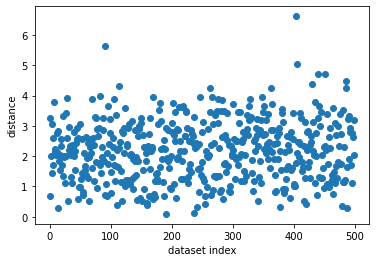

In [4]:
# Activity 2.2

def EuclideanDist(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  
  for i in range(npoints) :
    distances[i] =  np.sqrt((x[0]-data[i,0])**2 + (x[1]-data[i,1])**2)
    
  return distances


x = [0,0]
dist = EuclideanDist(x,df.values)
plt.figure()
plt.scatter(range(df.values.shape[0]), dist, marker='o')
plt.plot()
plt.xlabel('dataset index')
plt.ylabel('distance')
plt.show()


**2.3** Given an integer $k>0$, a pattern, and a set of training points, define a function that classifies the pattern according to the $k$-NN rule.

Use your function to classify the pattern $\mathbf{x} = (0,0)^\top$ according to the $7$-NN rule.

In [5]:
# Activity 2.3

def kNN_classifier(k,x,data):
  npoints = data.shape[0]
  # compute distance to training points
  
  dist = EuclideanDist(x,df.values)
  
  # sort along increasing distances
  ind = np.argsort(dist,axis=0)
  classes = data[:,2]
  classes_sorted = classes[ind]

  # determine class with more element in the k neighborhood
  c1 = 0
  c2 = 0
  
  for i in range(k):
    if classes_sorted[i] == 1:
      c1 +=1
    else:
      c2 +=1 
    
  if c1>c2:
    return 1
  else :
    return 2

x=[0,0]
k=7
print('class:',kNN_classifier(k,x,df.values))

class: 1


**2.4** Consider the set of points $\{(x_1,x_2): x_1,x_2\in\{-4,-3,-2,-1,0,1,2,3,4\}\}$ and classify each of them according the $7$-NN rule. Plot the results.

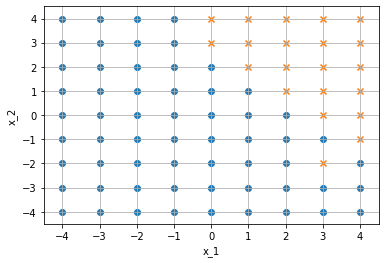

In [6]:
# Activity 2.4

# define grid of points to be classified 
x1, x2 = np.meshgrid(np.arange(-4,5), np.arange(-4, 5))
X_plot = np.c_[x1.ravel(), x2.ravel()]


# classify each point of the grid
classification_kNN = []

for i in range(X_plot.shape[0]):
  cl =kNN_classifier(7, X_plot[i], df.values)
  classification_kNN.append(cl)
classification_kNN = np.array(classification_kNN)

# plot results
plt.figure()
plt.scatter(X_plot[np.where(classification_kNN==1),0], X_plot[np.where(classification_kNN==1),1], marker='o')
plt.scatter(X_plot[np.where(classification_kNN==2),0], X_plot[np.where(classification_kNN==2),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)
plt.grid()
plt.show()

# Logistic regression (2-class case)

Consider two classes $\omega_1$ and $\omega_2$ and let 

$$ \ln\frac{P(\omega_1|\mathbf{x})}{P(\omega_2|\mathbf{x})} = \mathbf{\theta}^\top\mathbf{x}.$$

Noting that $P(\omega_1|\mathbf{x})+P(\omega_2|\mathbf{x})=1$, and defining the threshold variable $t=\mathbf{\theta}^\top\mathbf{x}$, we have

$$ P(\omega_1|\mathbf{x}) = \sigma(t)
\quad\text{and}\quad  P(\omega_1|\mathbf{x}) = 1-\sigma(t)$$

where

$$ \sigma(t) = \frac{1}{1+e^{-t}}$$

is known as the **logistic sigmoid**.

<Body>   
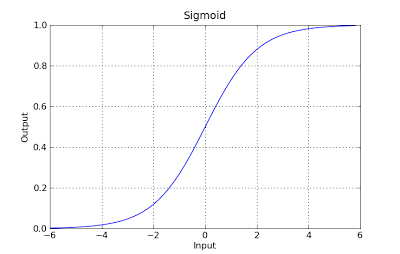

The parameter $\mathbf{\theta}$ is estimated using the **Maximum Likelihood method** applied to a set of training samples $\{(y_n,\mathbf{x}_n)\}_{n=1}^N$, where $y_n=0$ if $\mathbf{x}_n\in\omega_1$ and $y_n=1$ if $\mathbf{x}_n\in\omega_2$. The likelihood function is 

$$ P(y_1,\ldots,y_N|\mathbf{\theta}) = \prod_{n=1}^N
\left(\sigma(\mathbf{\theta}^\top\mathbf{x}_n)\right)^{y_n}
\left(1-\sigma(\mathbf{\theta}^\top\mathbf{x}_n)\right)^{1-y_n}.$$

and the negative log-likelihood is then

$$ L(\mathbf{\theta}) = \sum_{n=1}^N\left(
y_n\ln s_n + (1-y_n)\ln(1-s_n)\right) $$

where $s_n = \sigma(\mathbf{\theta}^\top\mathbf{x}_n)$.

Minimization of $ L(\mathbf{\theta})$ can be done using an iterative method such as the **gradient descent**.

Noting that

$$ \frac{d\sigma(t)}{dt} = \sigma(t)(1-\sigma(t)),$$

the gradient of the negative log-likelihood is 

$$\nabla L(\mathbf{\theta}) = \sum_{n=1}^N (s_n-y_n)\mathbf{x}_n=X^\top(s-y)$$

where

$$ X^\top = [\mathbf{x}_1,\ldots,\mathbf{x}_N],\quad
s = [s_1,\ldots,s_N],\quad y=[y_1,\ldots,y_N].$$

The gradient descent update scheme becomes

$$ \mathbf{\theta}^{(i+1)} = \mathbf{\theta}^{(i)} 
- \eta_i X^\top\left(s^{(i)}-y\right)$$
where $\eta_i>0$ is the learning rate. 


## **Activity 2**

Consider a two-dimensional class problem with two classes ($\omega_0$ and $\omega_1$), characterized by Gaussian distributions with means $\mu_1=\left(1,0\right)^\top$ and $\mu_2=\left(2,1\right)^\top$, and covariances 
$\Sigma_1 = \Sigma_2 = \left[\begin{array}{cc} 2 & -1 \\ -1 & 1\end{array}\right]$, respectively. Assume the classes are equiprobable. 

**2.1** Obtain a training set $\mathcal{X}$ and a test set $\mathcal{X}_\text{test}$, each consisting from $1000$ points from each class.


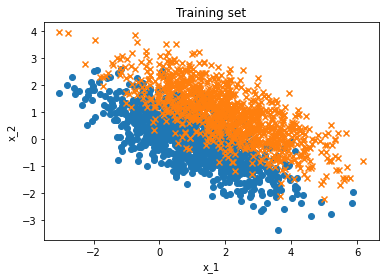

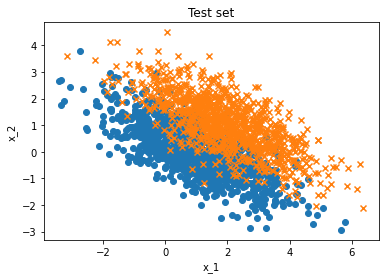

[[ 3.90333766 -1.73215595]
 [ 0.7655644   1.58256202]
 [-0.22752788  0.57822127]
 ...
 [-0.37384563  2.74388008]
 [ 1.46630906  0.9309507 ]
 [-1.77267106  4.12050268]]


In [7]:
# Activity 2.1 (solution)

import numpy as np 
import matplotlib.pyplot as plt


# multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5 * np.transpose(d) @ np.linalg.inv(cov) @ d
    f_term = 1.0/(np.sqrt( (2*np.pi)**n * np.linalg.det(cov)))
    pdf = f_term * np.exp(exp_term)
    return pdf


# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 = np.array([1,0])
sigma_1 = np.array([[2,-1],[-1,1]])

# Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[2,-1],[-1,1]])

# Generate training set
size_1 = 1000
size_2 = 1000
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)

size_total = size_1+size_2
Y_1 = 0*np.ones((size_1,1))
Y_2 =   np.ones((size_2,1))

# put all data together
X = np.concatenate([X_1, X_2], axis=0)
Y = np.concatenate([Y_1, Y_2], axis=0)

# plot data points
plt.title('Training set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 1 (o)
plt.scatter(X_1[:,0], X_1[:,1], marker='o')
# Class 2 (x)
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.plot()
plt.show()

# Generate test set
Xtest_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
Xtest_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)


# put all data together
Xtest = np.concatenate([Xtest_1, Xtest_2], axis=0)
Ytest = Y

# plot data points
plt.title('Test set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 0 (o)
plt.scatter(Xtest_1[:,0], Xtest_1[:,1], marker='o')
# Class 1 (x)
plt.scatter(Xtest_2[:,0], Xtest_2[:,1], marker='x')
plt.plot()
plt.show()

print(Xtest)

**2.2** Classify the points in $\mathcal{X}_\text{test}$ using the Bayesian classification rule.

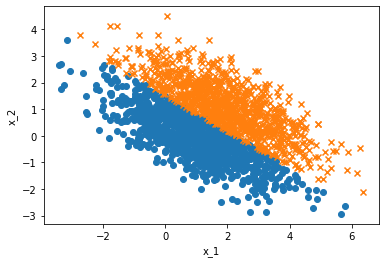

In [8]:
# Activity 2.2

# A priori probabilities
P_class1 = size_1/size_total
P_class2 = size_2/size_total

# classify each data point (Bayesian classification)
classification = []

for i in range(size_total):
  # to be completed... (compute conditional probabilities)
  prob_1 = P_class1 * gaussian(Xtest[i], mu_1, sigma_1)
  prob_2 = P_class2 * gaussian(Xtest[i], mu_2, sigma_2)
  # to be completed (classify)
  if prob_1 > prob_2:
    classification.append(0)
  else :
    classification.append(1)

classification = np.array(classification)

# plot results
plt.figure()
plt.scatter(Xtest[np.where(classification==0),0], Xtest[np.where(classification==0),1], marker='o')
plt.scatter(Xtest[np.where(classification==1),0], Xtest[np.where(classification==1),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

**2.3** Perform logistic regression using the training set $\mathcal{X}$ to estimate the parameter
vector $\mathcal{\theta}$. Classify the points in $\mathcal{X}_\text{test}$ using the estimated parameter.

*Note: Use the gradient descent method and a learning parameter $\eta_i=0.001$. Stop iterations when $||\theta^{(i)}-\theta^{(i-1)}||_{\infty}\leq10^{-4}$.*

430 [[-4.51054126  2.04295902  3.09073648]]


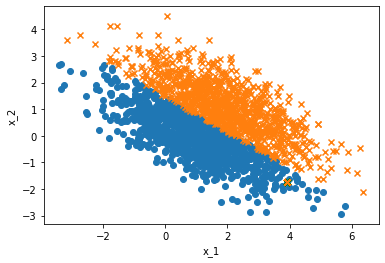

In [9]:
# Activity 2.3

# consider a 'bias' in the training set
Xones = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)

theta_ini = np.array([[0, 0, 0]])
error_thres = 1e-4
eta = 0.001

theta = np.copy(theta_ini)
iter = 0
error=1

while error > error_thres :
  iter += 1
  theta_old = np.copy(theta)
  s = 1 / (1 + np.exp(-Xones @ np.transpose(theta)))
  theta = theta - eta* np.transpose(s-Y) @ Xones
  error = np.sum(np.abs(theta-theta_old))

print(iter,theta)

# consider a 'bias' in the test set
Xtest_ones = np.concatenate([np.ones((Xtest.shape[0],1)), Xtest], axis=1)

# apply the logistic function to the test set
stest = 1 / (1 + np.exp( -Xtest_ones @ np.transpose(theta)))

# plot results
plt.figure()
plt.scatter(Xtest[np.where(stest<0.5),0], Xtest[np.where(stest<0.5),1], marker='o')
plt.scatter(Xtest[np.where(stest>=0.5),0], Xtest[np.where(stest>=0.5),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

**2.4** Compare the results obtained using the two methods. Show the points that are not classified in the same way.

In [10]:
# Activity 2.4

for i in range(size_total) :
  if classification[i] == 0 and stest[i]>0.5:
    print(Xtest[i],'Bayesian class is 0 and LOGREG class is 1')
  else :
    if classification[i] == 1  and stest[i]<0.5:
      print(Xtest[i],'Bayesian class is 1 and LOGREG class is 0')

[0.00625583 1.48614412] Bayesian class is 0 and LOGREG class is 1
[1.42882715 0.54059943] Bayesian class is 0 and LOGREG class is 1
[0.70162475 1.00998065] Bayesian class is 0 and LOGREG class is 1
[ 2.98732028 -0.5046536 ] Bayesian class is 0 and LOGREG class is 1
[2.0079877  0.15126916] Bayesian class is 0 and LOGREG class is 1
[1.39382859 0.55915643] Bayesian class is 0 and LOGREG class is 1
[-0.10735586  1.53792153] Bayesian class is 0 and LOGREG class is 1
[0.79926523 0.93949587] Bayesian class is 0 and LOGREG class is 1
[1.86923379 0.24758061] Bayesian class is 0 and LOGREG class is 1
[-0.62629824  1.90894693] Bayesian class is 0 and LOGREG class is 1
[2.10700705 0.06837522] Bayesian class is 0 and LOGREG class is 1
[0.64509714 1.06815318] Bayesian class is 0 and LOGREG class is 1
[ 3.47592831 -0.83496205] Bayesian class is 0 and LOGREG class is 1
[-1.18484877  2.25698004] Bayesian class is 0 and LOGREG class is 1
[1.3485946  0.58060223] Bayesian class is 0 and LOGREG class is 1


**2.5** Repeat the activity now considering that $\Sigma_2 = \left[\begin{array}{cc} 2 & 1 \\ 1 & 1\end{array}\right]$.

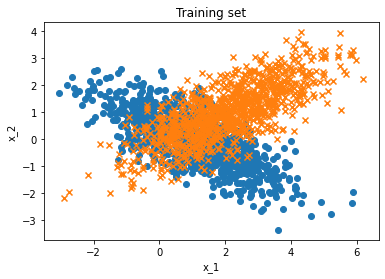

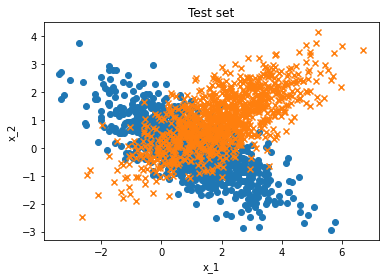

[[ 3.90333766 -1.73215595]
 [ 0.7655644   1.58256202]
 [-0.22752788  0.57822127]
 ...
 [-0.6213898  -0.3433452 ]
 [ 1.82308573  0.49177252]
 [-2.47825223 -0.97884836]]


In [11]:
# Activity 2.1 (solution)

import numpy as np 
import matplotlib.pyplot as plt


# multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5 * np.transpose(d) @ np.linalg.inv(cov) @ d
    f_term = 1.0/(np.sqrt( (2*np.pi)**n * np.linalg.det(cov)))
    pdf = f_term * np.exp(exp_term)
    return pdf


# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 = np.array([1,0])
sigma_1 = np.array([[2,-1],[-1,1]])

# Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[2,1],[1,1]])

# Generate training set
size_1 = 1000
size_2 = 1000
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)

size_total = size_1+size_2
Y_1 = 0*np.ones((size_1,1))
Y_2 =   np.ones((size_2,1))

# put all data together
X = np.concatenate([X_1, X_2], axis=0)
Y = np.concatenate([Y_1, Y_2], axis=0)

# plot data points
plt.title('Training set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 1 (o)
plt.scatter(X_1[:,0], X_1[:,1], marker='o')
# Class 2 (x)
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.plot()
plt.show()

# Generate test set
Xtest_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
Xtest_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)


# put all data together
Xtest = np.concatenate([Xtest_1, Xtest_2], axis=0)
Ytest = Y

# plot data points
plt.title('Test set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 0 (o)
plt.scatter(Xtest_1[:,0], Xtest_1[:,1], marker='o')
# Class 1 (x)
plt.scatter(Xtest_2[:,0], Xtest_2[:,1], marker='x')
plt.plot()
plt.show()

print(Xtest)

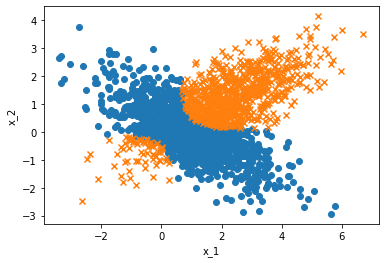

In [12]:
# Activity 2.2

# A priori probabilities
P_class1 = size_1/size_total
P_class2 = size_2/size_total

# classify each data point (Bayesian classification)
classification = []

for i in range(size_total):
  # to be completed... (compute conditional probabilities)
  prob_1 = P_class1 * gaussian(Xtest[i], mu_1, sigma_1)
  prob_2 = P_class2 * gaussian(Xtest[i], mu_2, sigma_2)
  # to be completed (classify)
  if prob_1 > prob_2:
    classification.append(0)
  else :
    classification.append(1)

classification = np.array(classification)

# plot results
plt.figure()
plt.scatter(Xtest[np.where(classification==0),0], Xtest[np.where(classification==0),1], marker='o')
plt.scatter(Xtest[np.where(classification==1),0], Xtest[np.where(classification==1),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

63 [[-1.22365659  0.55382676  1.05117872]]


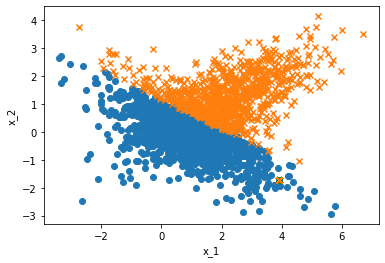

In [13]:
# Activity 2.3

# consider a 'bias' in the training set
Xones = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)

theta_ini = np.array([[0, 0, 0]])
error_thres = 1e-4
eta = 0.001

theta = np.copy(theta_ini)
iter = 0
error=1

while error > error_thres :
  iter += 1
  theta_old = np.copy(theta)
  s = 1 / (1 + np.exp(-Xones @ np.transpose(theta)))
  theta = theta - eta* np.transpose(s-Y) @ Xones
  error = np.sum(np.abs(theta-theta_old))

print(iter,theta)

# consider a 'bias' in the test set
Xtest_ones = np.concatenate([np.ones((Xtest.shape[0],1)), Xtest], axis=1)

# apply the logistic function to the test set
stest = 1 / (1 + np.exp( -Xtest_ones @ np.transpose(theta)))

# plot results
plt.figure()
plt.scatter(Xtest[np.where(stest<0.5),0], Xtest[np.where(stest<0.5),1], marker='o')
plt.scatter(Xtest[np.where(stest>=0.5),0], Xtest[np.where(stest>=0.5),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [14]:
# Activity 2.4

for i in range(size_total) :
  if classification[i] == 0 and stest[i]>0.5:
    print(Xtest[i],'Bayesian class is 0 and LOGREG class is 1')
  else :
    if classification[i] == 1  and stest[i]<0.5:
      print(Xtest[i],'Bayesian class is 1 and LOGREG class is 0')

[-1.19982589 -0.39439848] Bayesian class is 1 and LOGREG class is 0
[ 4.20746925 -0.36399475] Bayesian class is 0 and LOGREG class is 1
[3.49112834 0.04061352] Bayesian class is 0 and LOGREG class is 1
[-0.36973091  1.52137856] Bayesian class is 0 and LOGREG class is 1
[-0.31782054  1.60052408] Bayesian class is 0 and LOGREG class is 1
[-1.0983339   2.61049235] Bayesian class is 0 and LOGREG class is 1
[0.00625583 1.48614412] Bayesian class is 0 and LOGREG class is 1
[-0.35281585 -0.49747903] Bayesian class is 1 and LOGREG class is 0
[1.43862804 0.36448144] Bayesian class is 1 and LOGREG class is 0
[-1.95397688  2.28946654] Bayesian class is 0 and LOGREG class is 1
[-0.95227247  1.73580486] Bayesian class is 0 and LOGREG class is 1
[0.60386931 1.8185998 ] Bayesian class is 0 and LOGREG class is 1
[1.24098777 0.45723175] Bayesian class is 1 and LOGREG class is 0
[-0.95561541  2.04437222] Bayesian class is 0 and LOGREG class is 1
[1.02626345 0.54284832] Bayesian class is 1 and LOGREG cla